# Stories with Data

## Story 3 : All Space Missions from 1957 

Dataset : https://www.kaggle.com/agirlcoding/all-space-missions-from-1957 ✋🚀 

In [21]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [22]:
#Reading the data of All Space Missions from 1957
df = pd.read_csv("Space_corrected.csv")

In [23]:
#Cleaning the data and preprocessing.
df['DateTime'] = pd.to_datetime(df['Datum'])

#Extract the launch year
df['Year'] = df['DateTime'].apply(lambda datetime: datetime.year)

#Extract the country of launch
df["Country"] = df["Location"].apply(lambda location: location.split(", ")[-1])

df.head(3)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,DateTime,Year,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,USA


In [24]:
#Dropping the Unnamed columns
df.drop(columns={"Unnamed: 0", "Unnamed: 0.1"}, axis = 1, inplace = True)
df.head(1)

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,DateTime,Year,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,USA


In [25]:
df.shape

(4324, 10)

## Data Visualization and Insights Extraction

Now we have cleaned data, we have not used any feature extraction techniques on our data to make few new features out of it. I am not using any of the NLP techniques, I am now going to analyse and visualize data for better understanding and insight extraction.

I am going to start with the comapnies who have launched several number of Rockets.

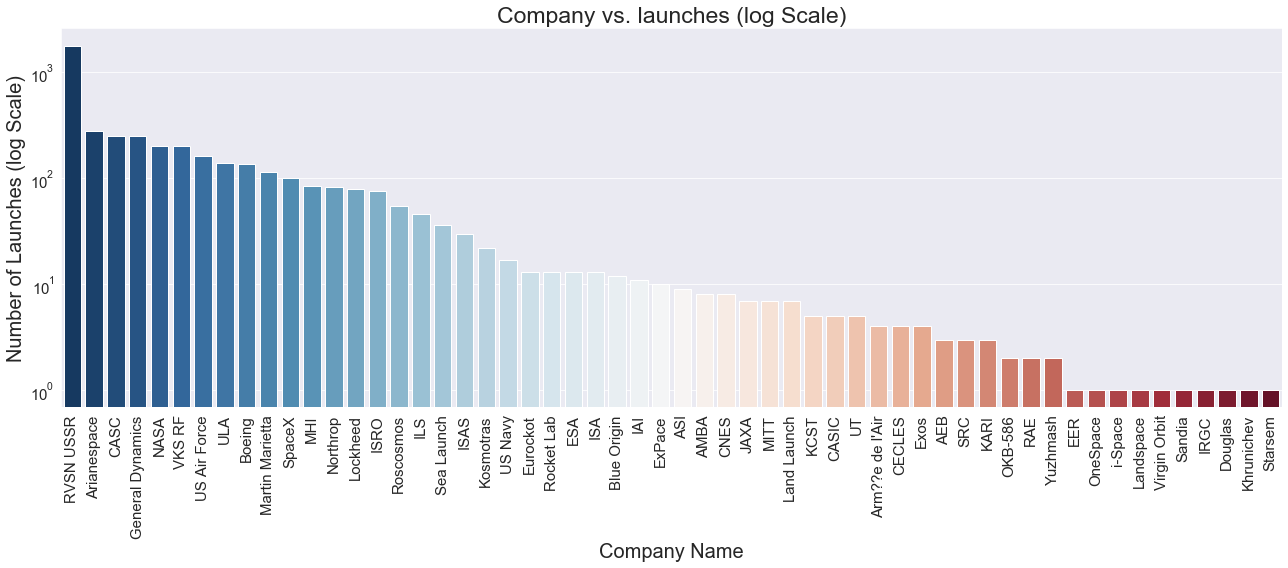

In [26]:
#Number of launches vs the Company
plt.figure(figsize=(18,8))
ax = sns.countplot(x="Company Name", data=df, order=df["Company Name"].value_counts().index, palette = "RdBu_r")

#Since there are several agencies with small number of launches we are going to use log scale for better visualization.
ax.set_yscale("log")

ax.axes.set_title("Company vs. launches (log Scale)",fontsize=23)
ax.set_ylabel("Number of Launches (log Scale)",fontsize=20)
ax.set_xlabel("Company Name",fontsize=20)
ax.tick_params(labelsize=15)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In number of launches company named RVSN USSR leaded since the start and have launced total of 1750+ Rockets. Which is followed by the company Arianespace, then General Dynamics , then CASC, 5th position there is NASA. There is a total number of 56 Space agencies.  

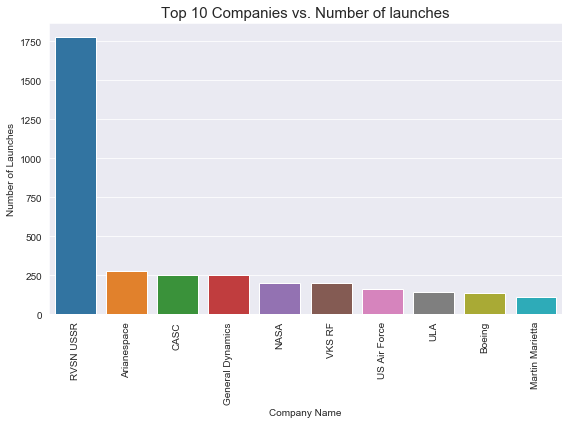

In [27]:
#Number of launches vs the Company
plt.figure(figsize=(8,6))
order=df["Company Name"].value_counts().index
ax = sns.countplot(x="Company Name", data=df, order=order[:10])
ax.axes.set_title("Top 10 Companies vs. Number of launches", fontsize=15)
ax.set_ylabel("Number of Launches")
ax.set_xlabel("Company Name")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Here is the Top 10 Companies leading the world in Rocket launches since 1957:
1. RVSN USSR
2. Arianespace
3. General Dynamics
4. CASC
5. NASA
6. VKS RF
7. USA Air Force
8. ULA
9. Boeing
10. Martin Marietta

Since there are several companies in a country, which means a country launches their Rockets through different Companies.

In [28]:
#Country and Copany wise
df["No. Of launches by Country by Company"] = 1
Countrywise = df[["Country", "Company Name", "No. Of launches by Country by Company"]].groupby(
    ["Country", "Company Name"]).sum()
Sorted = Countrywise.sort_values(by = "No. Of launches by Country by Company", ascending = False)
Sorted.head(10)

No. Of launches by Country by Company
Country    Company Name                                           
Russia     RVSN USSR                                          1198
Kazakhstan RVSN USSR                                           579
France     Arianespace                                         277
USA        General Dynamics                                    251
China      CASC                                                250
USA        NASA                                                203
           US Air Force                                        161
Russia     VKS RF                                              157
USA        ULA                                                 140
           Boeing                                              136

After visualizing the number of launches per company, now let's go with the number of launches by different countries.

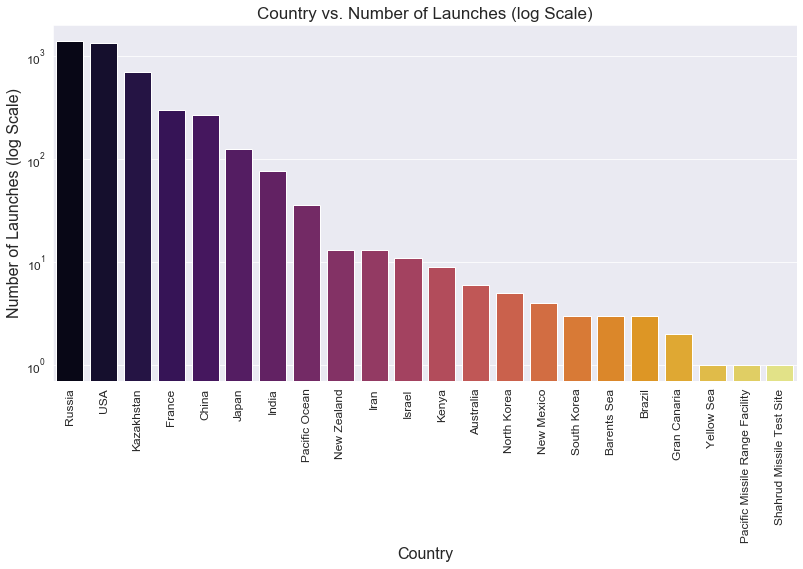

In [29]:
#Country vs Number of launches
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Country", data=df, order=df["Country"].value_counts().index, palette="inferno")
ax.set_yscale("log")
ax.axes.set_title("Country vs. Number of Launches (log Scale)",fontsize=17)
ax.set_ylabel("Number of Launches (log Scale)",fontsize=16)
ax.set_xlabel("Country",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

### Top 10 leading Countries.

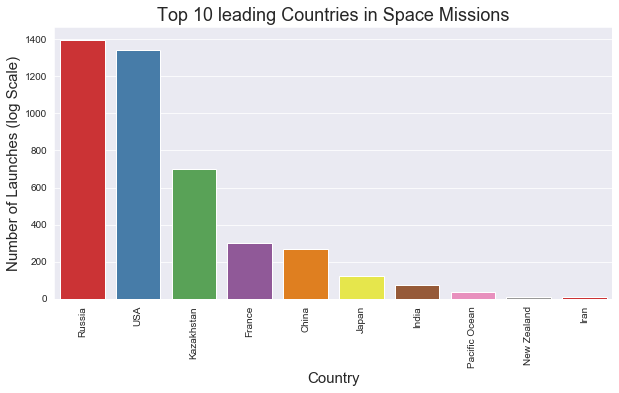

In [30]:
plt.figure(figsize=(10,5))
order = df["Country"].value_counts().index
ax = sns.countplot(x="Country", data=df, order = order[:10], palette ="Set1")
ax.set_ylabel("Number of Launches (log Scale)",fontsize=15)
ax.set_xlabel("Country",fontsize=15)
plt.xticks(rotation = 90)
plt.title("Top 10 leading Countries in Space Missions", fontsize=18)
plt.show()

Top 10 Countries leading in Space Race :
1. Russia        	
2. USA	           
3. Kazakhstan	    
4. France	      
5. China	     
6. Japan	       
7. India	     
8. Pacific Ocean	
9. Iran
10. New Zeland

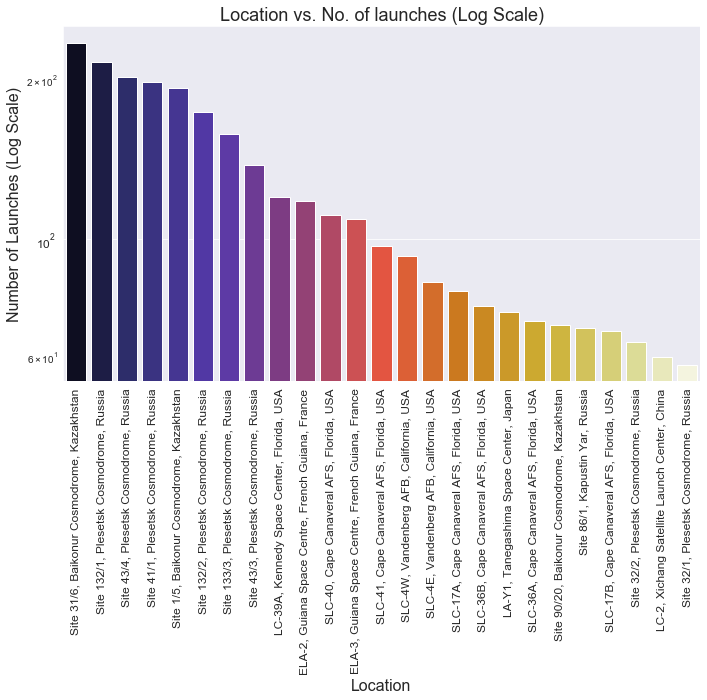

In [31]:
#Launch Sites vs Number of launches
plt.figure(figsize=(12,6))
order=df["Location"].value_counts().index
ax = sns.countplot(x="Location", data=df, order = order[:25], palette = "CMRmap")
ax.set_yscale("log")
ax.axes.set_title("Location vs. No. of launches (Log Scale)",fontsize=18)
ax.set_ylabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_xlabel("Location",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

It's pretty amazing even how having second largest number of launches by Kazakhstan, maximum number of launches are from the Kazakhstan's site location named 'Site 31/6, Baikonur Cosmodrone, Kazakhstan'.

- Baikonur Site 31, also known as Site 31/6 at the Baikonur Cosmodrome, in Kazakhstan, is a launch site used by derivatives of   the R-7 Semyorka missile. 
- Orbital inclination range: 49° – 99°
- Launch pad: 1
- Launch site: Baikonur Cosmodrome
- Total launches: TBC
- Operators: Strategic Missile Forces, Russian Space Forces, Roscosmos

The first Site 31/6, Baikonur Cosmodrone, Kazakhstan follwed by 'three' Russian sites since Russia has always leaded in the launches as we have seen in Country vs Number of launches graph.

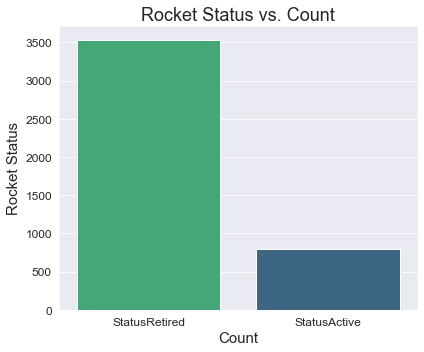

In [32]:
#Rocket status in the current scenerio
plt.figure(figsize=(6,5))
ax = sns.countplot(x="Status Rocket", data=df, order=df["Status Rocket"].value_counts().index, palette="viridis_r")
ax.axes.set_title("Rocket Status vs. Count",fontsize=18)
ax.set_xlabel("Count",fontsize=15)
ax.set_ylabel("Rocket Status",fontsize=15)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

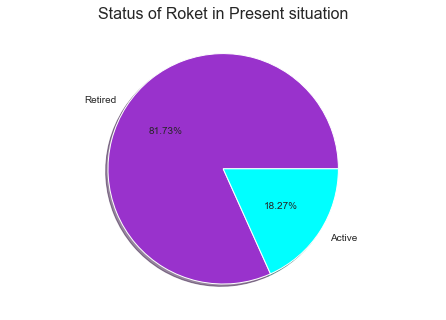

In [33]:
#Visualize the percentage distribution.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ["Retired", "Active"]
ax.pie(df["Status Rocket"].value_counts(), labels = langs, autopct='%1.2f%%', shadow = True, colors = ["darkorchid","aqua"])
plt.title("Status of Roket in Present situation", fontsize=16)
plt.show()

As the pie chart shows, status of most of the rockets are retired which is 81.73%, and remaining 18.27% are still active. 

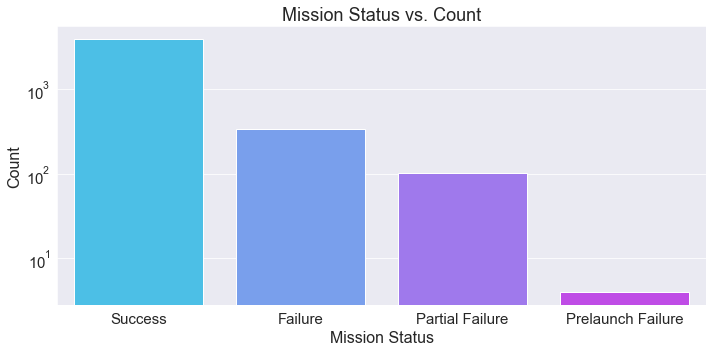

In [34]:
#Mission status
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Status Mission", data=df, order=df["Status Mission"].value_counts().index, palette="cool")
ax.axes.set_title("Mission Status vs. Count",fontsize=18)
ax.set_ylabel("Count",fontsize=16)
ax.set_yscale("log")
ax.set_xlabel("Mission Status",fontsize=16)
ax.tick_params(labelsize=15)
plt.tight_layout()
plt.show()

Most of the Mission status are Success, there is approximate 1:10 ratio between the success and failure missions. There are very few Prelauch failure whereas Partial failure are large when compared to Prelaunch failure. 

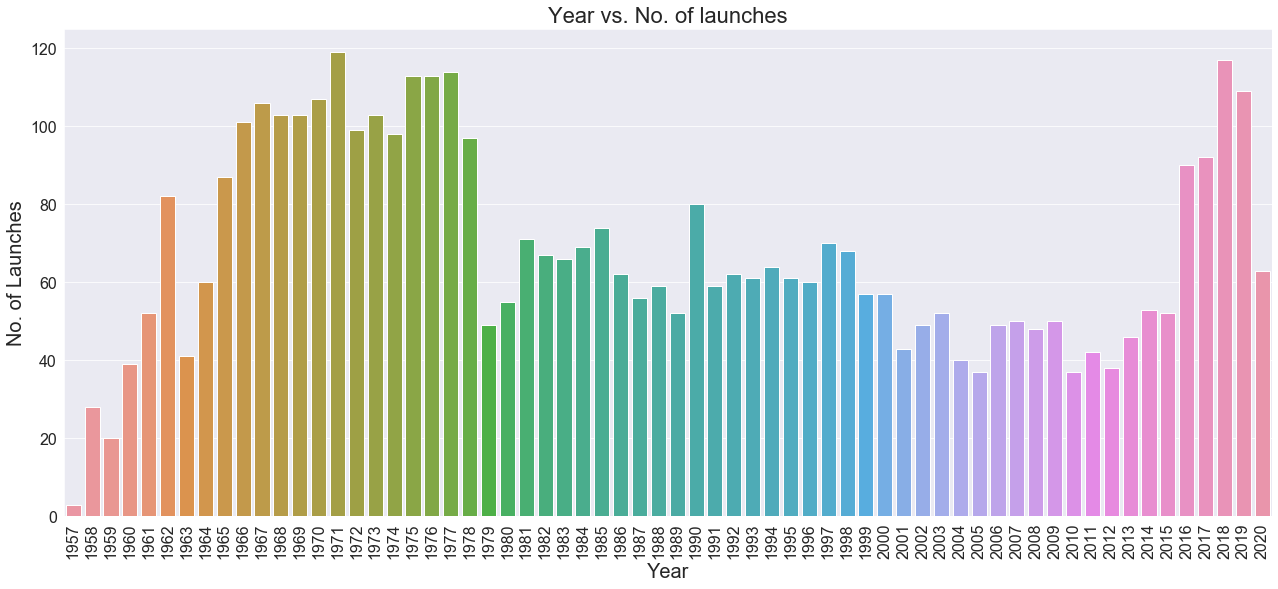

In [35]:
#Number of launches per year.
plt.figure(figsize=(18,8))
ax = sns.countplot(x=df['Year'])
ax.axes.set_title("Year vs. No. of launches",fontsize=22)
ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("No. of Launches",fontsize=20)
ax.tick_params(labelsize=16)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

We can see maximum number of launches is in the year 1971.
Here is a list of Top 10 year with highest number of launches.
    -   Year	    launches
    1.  1971	      119
    2.  2018          117
    3.  1977	      114
    4.  1976	      113
    5.  1975	      113
    6.  2019	      109
    7.  1970	      107
    8.  1967	      106
    9.  1968	      103
    10. 1969          103

## Consider the 'last Decade' Space Road -

In [36]:
#last deacde data extraction
Decade = df[df["Year"] > 2010]

In [37]:
Decade.head(3)

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,DateTime,Year,Country,No. Of launches by Country by Company
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,USA,1
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China,1
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,USA,1


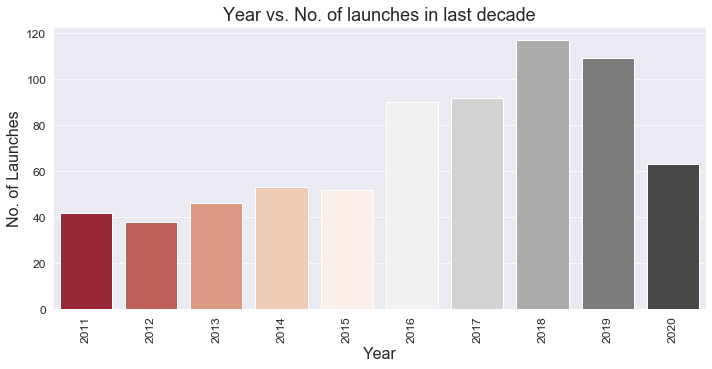

In [38]:
#Number of launches per year in last decade.
plt.figure(figsize=(10,5))
ax = sns.countplot(x=Decade['Year'], palette = "RdGy")
ax.axes.set_title("Year vs. No. of launches in last decade",fontsize=18)
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("No. of Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

In the last decade maximum number of launches were in the year 2018, followed by 2019 and 2017. We are in the middle of 2020 as per this rate we would have expected 2020 be the year of most number of launches but this pandemic affected it.

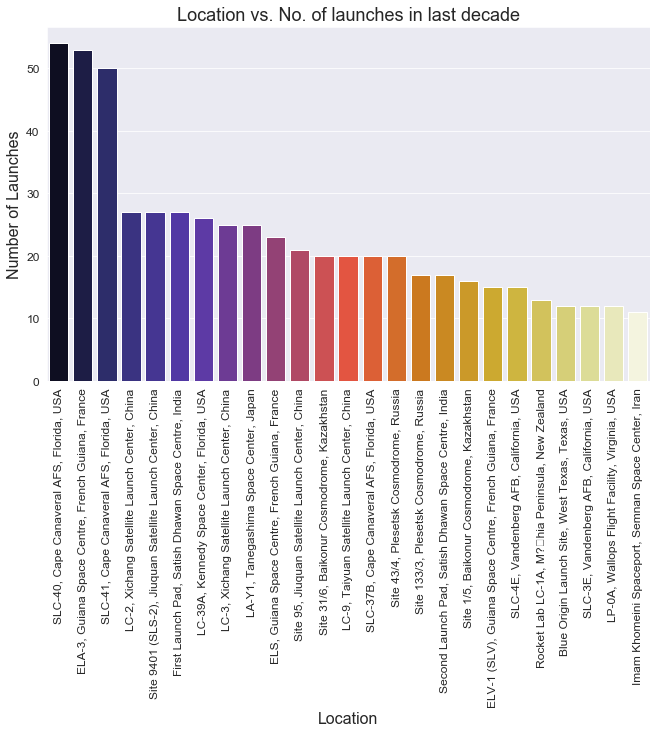

In [39]:
#Launch Sites vs Number of launches in last decade
plt.figure(figsize=(12,6))
order=Decade["Location"].value_counts().index
ax = sns.countplot(x="Location", data=Decade, order = order[:25], palette = "CMRmap")
ax.axes.set_title("Location vs. No. of launches in last decade",fontsize=18)
ax.set_ylabel("Number of Launches",fontsize=16)
ax.set_xlabel("Location",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

In this decade, maximun number of launches are from the 'Site SLC - 40, Cape Canaveral AFS, Florida, USA.' 

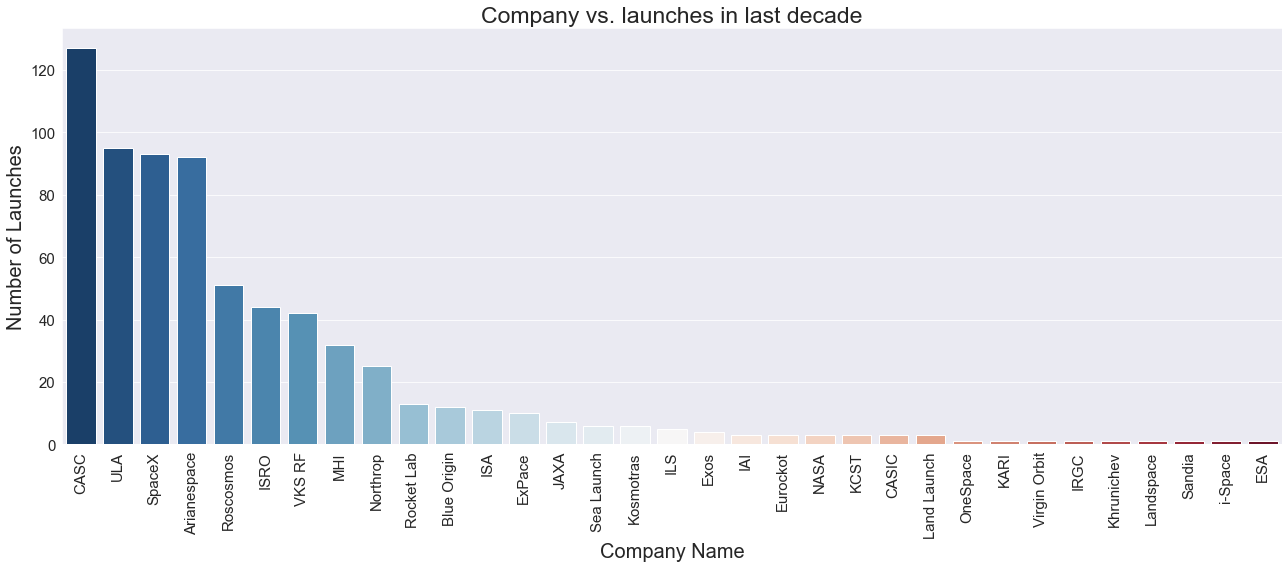

In [40]:
#Number of launches vs the Company in last decade
plt.figure(figsize=(18,8))
ax = sns.countplot(x="Company Name", data=Decade, order=Decade["Company Name"].value_counts().index, palette = "RdBu_r")
ax.axes.set_title("Company vs. launches in last decade",fontsize=23)
ax.set_ylabel("Number of Launches",fontsize=20)
ax.set_xlabel("Company Name",fontsize=20)
ax.tick_params(labelsize=15)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### Important Conslusions :

1. In number of launches  RVSN USSR leaded since the start and have launced total of 1750+ Rockets. Which is followed by the company Arianespace, then General Dynamics , then CASC, 5th position there is NASA.
   ISRO stands at the 15th position in total number of launches.

2. Russia has leaded in total number of launches frim the start followed by USA, Kazakhstan, France, China, Japan and India.

3. Site 31/6, Baikonur Cosmodrone of Kazakhstan has the most number of launches even though having second in launching total number of rockets in all country while Russis holds the first. 

4. In the last decade the China Aerospace Science and Technology Corporation (CASC) launched the most number of rockets making it the world leader company for the last decade but RVSN USSR still holds the title for the most number of launches.

5. Most of the Mission status are Success, there is approximate 1:10 ratio between the success and failure missions

6. Maximum number of launches were in th year 1971, which show the exponential growth of space exploration in early 80's.

###### RECENT DECADE 
7. Maximum number of launches were in the year 2018, followed by 2019 and 2017.

8. Site SLC - 40, Cape Canaveral AFS, Florida, USA has the maximum number of launches in this decade.

9. CASC holds the first in position in Comapnies who have launches max. number of rockets in the last decade. EWhich is followed by ULA, and at 3rd position there is SpaceX.
 ISRO holds the 6th in total number of lauches in last decade, it has jumped from 15th in total to 6th in last 1 years.:) 

## That's it with this Story for now! Will be back with another story.